# Week 5 indexing solution

First -- generate some random data for indexing

In [1]:
import numpy.random as nr
from matplotlib import pyplot as plt
import numpy as np
def makeRandom(meanx=None,stdx=None,meany=None,stdy=None,rho=None,
               numpoints=4000):
    """
        return a tuple with two vectors (xvec,yvec) giving the
        coordinates of numpoints chosen from a two dimensional
        Gauassian distribution

        Parameters
        ----------

        meanx: float -- mean in x direction
        stdx:  float -- standard deviation in x direction
        meany: float -- mean in y direction
        stdy:  float -- standar deviation in y direction
        numpoints:  length of returned xvec and yvec
        

        Returns
        -------

        (xvec, yvec): tuple of ndarray vectors of length numpoints

        Example
        -------

        invalues={'meanx':450.,
                  'stdx':50,
                  'meany':270,
                  'stdy':40,
                  'rho':0.8}

        chanx,chany=makeRandom(**invalues)
        

    """
 
    nr.seed(50)
    sigma=np.array([stdx**2., rho*stdx*stdy, rho*stdx*stdy, stdy**2.])
    sigma.shape=[2,2]
    meanvec=[meanx,meany]
    outRandom=nr.multivariate_normal(meanvec,sigma,[numpoints,])
    chan1=outRandom[:,0]
    chan2=outRandom[:,1]
    return (chan1,chan2)

In [2]:
#
# first bullseye centered at (x=450,y= -180)
#
invalues={'meanx':450.,
          'stdx':50,
          'meany':270,
          'stdy':20,
          'rho':0.8}


chanx,chany=makeRandom(**invalues)

#
# second bullseye centered at (x=50,y=-80)
#
bullseye={'meanx':50.,
          'stdx':14,
          'meany':250,
          'stdy':14,
          'rho':0.0}

chanxB,chanyB=makeRandom(**bullseye)
chanx=np.concatenate((chanx,chanxB))
chany=np.concatenate((chany,chanyB))

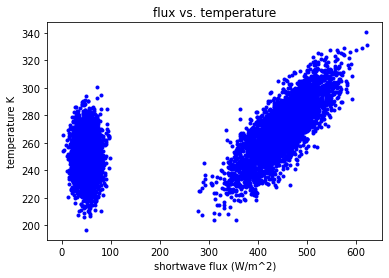

In [3]:
fig, ax = plt.subplots(1,1)
ax.plot(chanx,chany,'b.')
ax.set_title('flux vs. temperature')
ax.set_xlabel('shortwave flux (W/m^2)')
ax.set_ylabel('temperature K')
np.savez('temp_flux.npz',flux=chanx,temp=chany)

## Read in the data

This is a fake satellite image with longwave flulx in a vector called "flux" and brightness temperature in a vector called "temp".  I've stored them in an [npz file](https://numpy.org/doc/stable/reference/generated/numpy.savez.html) using np.savez.

In the cells below, you'll be asked to add new points to the figure, and then
redisplay using `display(fig)`

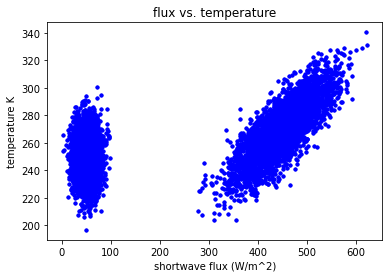

In [4]:
filename='temp_flux.npz'
the_data = np.load(filename)
flux = the_data['flux']
temp = the_data['temp']
ax.plot(flux,temp, 'b.')
display(fig)

## Q1 -- `logical_and` for flux

Find all pixels with flux values between 500 and 550 $W/m^2$ and color them yellow.

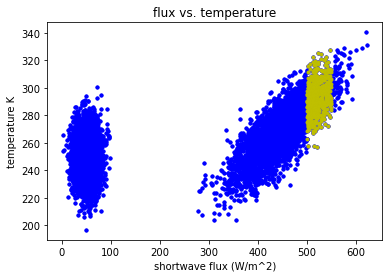

In [5]:
hit = np.logical_and(flux > 500,flux< 550)
ax.plot(flux[hit],temp[hit], 'y.')
display(fig)

In [6]:
np.sum(hit)

533

## Q2 -- `logical_and` for temperature and flux

Now extend this by finding all pixels with fluxes between 500 and 550 $W/m^2$
and temperatures greater than 300 K and color those cyan.  Redisplay the figure.

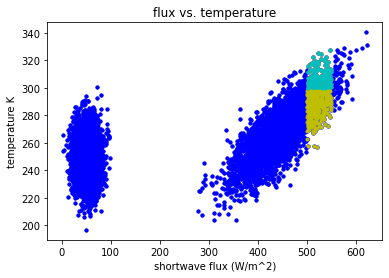

(array([38., 23., 33., 13., 22.,  5.,  8.,  4.,  3.,  2.]),
 array([300.09955791, 302.85151778, 305.60347766, 308.35543754,
        311.10739742, 313.8593573 , 316.61131717, 319.36327705,
        322.11523693, 324.86719681, 327.61915669]),
 <BarContainer object of 10 artists>)

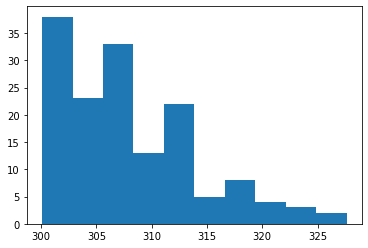

In [7]:
hit2 = temp > 300.
combined = np.logical_and(hit, hit2)
ax.plot(flux[combined], temp[combined], 'c.')
display(fig)
np.sum(combined)
plt.hist(temp[combined])

## Q3 -- argmax

Now find the index of the maximum temperature, and use that index to find the flux for that hottest pixel.
Make that pixel a large green dot with `ax.plot(the_flux,the_temp,'g.',markersize=20)`

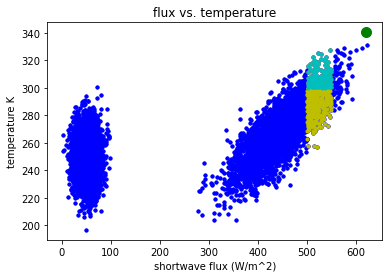

In [8]:
maxtemp_index = np.argmax(temp)
the_temp = temp[maxtemp_index]
the_flux = flux[maxtemp_index]
ax.plot(the_flux,the_temp,'g.',markersize=20)
display(fig)